In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import nltk
nltk.download('punkt')

from nltk.tokenize import LineTokenizer
from nltk.tokenize import word_tokenize

from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import string

from collections import Counter, deque
from nltk.tokenize import regexp_tokenize
import pandas as pd


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
#Input = "As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus. The expansive view of the term isn't universal, though: In some cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate category. Data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance. Depending on the particular application, the data that's analyzed can consist of either historical records or new information that has been processed for real-time analytics uses. In addition, it can come from a mix of internal systems and external data sources. At a high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find patterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical techniques to determine whether hypotheses about a data set are true or false. EDA is often compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also be separated into quantitative data analysis and qualitative data analysis. The former involves analysis of numerical data with quantifiable variables that can be compared or measured statistically. The qualitative approach is more interpretive -- it focuses on understanding the content of non-numerical data like text, images, audio and video, including common phrases, themes and points of view."
#Lines = Input.splitlines() #puts the file into list
#words = Input #puts the file into string

#Import data
fileObj = open("../input/aceassess/Paragraph.txt", "r") #opens the file in read mode
Lines = fileObj.read().splitlines() #puts the file into list
fileObj.close()

fileObj = open("../input/aceassess/Paragraph.txt", "r") #opens the file in read mode
words = fileObj.read() #puts the file into string
fileObj.close()

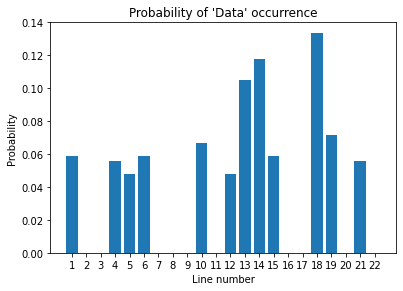

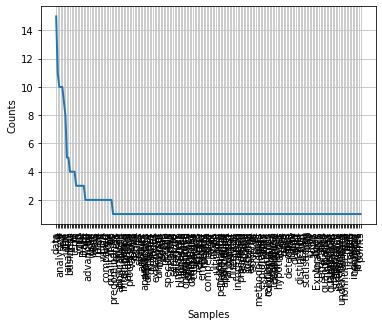

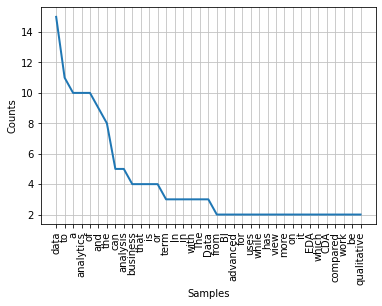

6
Probability of 'Analytics' occuring after 'Data' is:
0.3333333333333333


In [10]:


#Probability of word "data" in each of the 22 lines
Prob =[]
x =[]
count=0
for line in Lines:
    WordToken=word_tokenize(line) 
    fdist = FreqDist(WordToken)
    Prob.append(fdist.freq('data'))
    x.append(count+1)
    count+=1    

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_title("Probability of 'Data' occurrence")
ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xlabel('Line number')
ax.bar(x,Prob)
plt.show()

#Distribution of distinct words across all 22 lines
words=words.translate(str.maketrans('','',string.punctuation))#Remove punctuation
WordToken=word_tokenize(words)
fdist = FreqDist(WordToken)
fdist.plot(len(fdist),cumulative=False)
plt.show()
#Do not show words that only occur once
fdist.plot(len(fdist)-len(fdist.hapaxes()),cumulative=False)
plt.show()


#Probability of the word "analytics" occurring after the word "data"
def grouper(iterable, length=2):
    i = iter(iterable)
    q = deque(map(next, [i] * length))
    while True:
        yield tuple(q)
        try:
            q.append(next(i))
            q.popleft()
        except StopIteration:
            break

def tokenize(text):
    return [word.lower() for word in regexp_tokenize(text, r'\w+')]

def follow_probability(word1, word2, vec):
    subvec = vec.loc[word1]
    try:
        ct = subvec.loc[word2]
        print(ct)
    except:
        ct = 0
    return float(ct) / (subvec.sum() or 1)


tokens = tokenize(words)
markov = list(grouper(tokens))
vec = pd.Series(Counter(markov))
Probability = follow_probability('data', 'analytics', vec)
print("Probability of 'Analytics' occuring after 'Data' is:")
print(Probability)














